In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from google.colab import files

In [ ]:
train_df = pd.read_csv('train_features.csv')
test_df = pd.read_csv('test_features.csv')

train_df['cp_type'].replace(['ctl_vehicle', 'trt_cp'], [0,1], inplace=True)
test_df['cp_type'].replace(['ctl_vehicle', 'trt_cp'], [0,1], inplace=True)

train_df['cp_dose'].replace(['D1','D2'],[0,1],inplace = True)
test_df['cp_dose'].replace(['D1','D2'],[0,1],inplace = True)

In [ ]:
drug_df = pd.read_csv('train_drug.csv')
target_df = pd.read_csv('train_targets_scored.csv')

In [ ]:
#number of drugs per subject
drug_list = set(drug_df['drug_id'])
hist_array = []
for drug in drug_list:
    num_subjects = len(drug_df.index[drug_df['drug_id'] == drug].tolist())
    hist_array.append(num_subjects)

fig = plt.plot(np.sort(hist_array)[::-1])

In [ ]:
fig = plt.figure(figsize=(16, 20), dpi = 200)
sns.set_style('whitegrid')
sns.barplot(x=target_df.drop('sig_id',axis=1).sum(axis=0).sort_values(ascending=False).values,
            y=target_df.drop('sig_id',axis=1).sum(axis=0).sort_values(ascending=False).index)
plt.tick_params(axis='x', labelsize=6)
plt.tick_params(axis='y', labelsize=6)
plt.xlabel('number of subjects')
plt.ylabel('')
plt.title('Target Classification Counts', size=18, pad=18, weight='bold')
fig.show()
plt.savefig('moa_number.png',bbox_inches = 'tight')
#files.download('moa_number.png')

PCA PLOT 2D, 3D, COLOR CODE

In [ ]:
pca_array = np.array(train_df.drop('sig_id',axis=1))
n_dim = 2
pca = PCA(n_components = 2)
pca_results = pca.fit_transform(pca_array)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


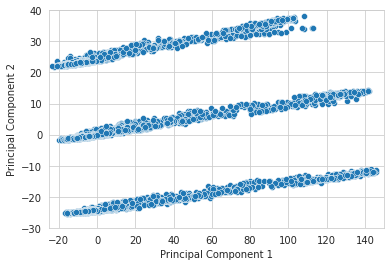

In [ ]:
pca_df = pd.DataFrame(data = pca_results, columns = ['PC'+str(i+1) for i in range(n_dim)])
sns.set_style('whitegrid')
fig = sns.scatterplot(pca_results[:,0], pca_results[:,1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.xlim([-25,150])
plt.ylim([-30,40])
plt.savefig('pca_plot_first.png',bbox_inches = 'tight',dpi=300)

In [ ]:
dfx = pd.concat([pca_df,train_df['cp_time']], axis = 1)

In [ ]:
#3D PCA plot
import plotly.express as px
!pip install -U kaleido
pca = PCA(n_components = 3)
principal_components = pca.fit_transform(pca_array)
pca_df = pd.DataFrame(data = principal_components, columns = ['PC'+str(i+1) for i in range(3)])
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3')
            #   color='petal_length', size='petal_length', size_max=18,
            #   symbol='species', opacity=0.7)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
#fig.write_image('3d_pca.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


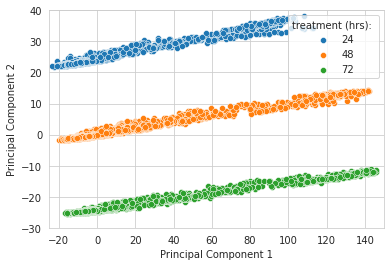

In [ ]:
for label in np.unique(dfx['cp_time']):
    #plt.scatter(dfx.loc[dfx['cp_time'] == label]['PC1'], dfx.loc[dfx['cp_time'] == label]['PC2'], label = label)
    sns.scatterplot(dfx.loc[dfx['cp_time'] == label]['PC1'], dfx.loc[dfx['cp_time'] == label]['PC2'], label = label)
#plot2 = plt.scatter(pca_temp_df['PC1'], pca_temp_df['PC2'], c = pca_temp_df['cp_time'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.xlim([-25,150])
plt.ylim([-30,40])
plt.legend(title = 'treatment (hrs): ')
plt.savefig('pca_plot_separated.png',bbox_inches = 'tight', dpi = 300)
#this means the gene expression and viability to the drug candidates map proportionally (or are a linear function) to the duration of treatment

In [ ]:
#VARIANCE THRESHOLD
#How many PCs to select 

pca = PCA().fit(pca_array)

In [ ]:


plt.rcParams["figure.figsize"] = (12,6)
sns.set_style('whitegrid')
fig, ax = plt.subplots()
xi = np.arange(1, 875, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='x', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 876, step=50)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.1, 0.9, '95% cut-off', color = 'red', fontsize=12)

ax.grid(axis='x')
fig.show()
plt.savefig('variance_threshold.png',bbox_inches = 'tight',dpi=300)

In [ ]:
#try PCA with only one time point
df_24 = train_df[train_df['cp_time'] == 24]
df_24 = df_24.drop(['sig_id','cp_time'],axis=1)

In [ ]:
pca2_array = pca.fit_transform(df_24.to_numpy())

In [ ]:
for time in [24, 48, 72]:
    temp_df = train_df[train_df['cp_time'] == time]
    temp_df = temp_df.drop(['sig_id','cp_time'],axis=1)
    pca2_array = pca.fit_transform(temp_df.to_numpy())
    sns.scatterplot(pca2_array[:,0],pca2_array[:,1], label = time)
plt.legend(title = 'treatment (hrs)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('pca_time_separated.png',bbox_inches = 'tight', dpi = 300)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
df_24 = train_df[train_df['cp_time'] == 24].drop(['sig_id','cp_time'],axis=1)
df_48 = train_df[train_df['cp_time'] == 48].drop(['sig_id','cp_time'],axis=1)
df_72 = train_df[train_df['cp_time'] == 72].drop(['sig_id','cp_time'],axis=1)

In [ ]:

tsne_24 = TSNE(n_components = 2, learning_rate = 'auto', init = 'random').fit_transform(df_24.to_numpy())
tsne_48 = TSNE(n_components = 2, learning_rate = 'auto', init = 'random').fit_transform(df_48.to_numpy())
tsne_72 = TSNE(n_components = 2, learning_rate = 'auto', init = 'random').fit_transform(df_72.to_numpy())

In [ ]:
tnse_all = TSNE(n_components= 2,  learning_rate = 'auto', init = 'random').fit_transform(pca_array)

In [ ]:

plt.figure()
sns.scatterplot(tsne_24[:,0], tsne_24[:,1],color = 'blue')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.title('t-SNE on 24hr treatment time')
plt.savefig('tsne_24.png',bbox_inches = 'tight', dpi = 300)

plt.figure()
sns.scatterplot(tsne_48[:,0], tsne_48[:,1],color = 'red')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.title('t-SNE on 48hr treatment time')
plt.savefig('tsne_48.png',bbox_inches = 'tight', dpi = 300)

plt.figure()
sns.scatterplot(tsne_72[:,0], tsne_72[:,1],color = 'green')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.title('t-SNE on 72hr treatment time')
plt.savefig('tsne_72.png',bbox_inches = 'tight', dpi = 300)

plt.figure()
sns.scatterplot(tnse_all[:,0], tnse_all[:,1],color = 'orange')
plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.title('t-SNE on all treatment times')
plt.savefig('tsne_all.png',bbox_inches = 'tight', dpi = 300)


Figures:

Density plot of number of subjects per MoA \\
Density plot of number of subjects per drug \\
PCA plot 2D, 3D, with one subj_id annotated \\
https://www.kaggle.com/code/cdeotte/moa-post-process-lb-1777 \\
https://www.kaggle.com/code/kushal1506/moa-prediction-complete-walkthrough-eda-ensemble \\


In [ ]:
#number of drugs
fig = plt.figure(figsize=(16,20))
sns.set_style('whitegrid')
sns.barplot(x=drug_df['drug_id'].value_counts().values[:24],
            y=drug_df['drug_id'].value_counts().index[:24],palette = "viridis")
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.xlabel('number of subjects')
plt.ylabel('')
plt.title('Most frequently administered drugs', size=18, pad=18, weight='bold')
fig.show()
plt.savefig('drug_number.png')

In [ ]:
#gene figures
import random
plt.style.use('seaborn')
sns.set_style('whitegrid')
gene_cols = [col for col in train_df.columns if 'g-' in col]
cell_cols = [col for col in train_df.columns if 'c-' in col]
random_genes = np.random.choice(gene_cols,16)
random_cells = np.random.choice(cell_cols,16)
plt.figure(figsize = (16,16))
for i,gene in enumerate(random_genes):
    plt.subplot(4,4,i+1)
    plt.hist(train_df[gene],bins=88,color="deepskyblue")
    plt.ylim([0,3200])
    plt.xlim([-8,8])
    plt.title(gene)

plt.savefig('gene_dist.png',bbox_inches = 'tight',dpi=300)

In [ ]:
plt.figure(figsize = (16,16))
for i,cell in enumerate(random_cells):
    plt.subplot(4,4,i+1)
    plt.hist(train_df[cell],bins=88,color="moccasin")
    plt.ylim([0,2400])
    plt.xlim([-8,8])
    plt.title(cell)

plt.savefig('cell_dist.png')

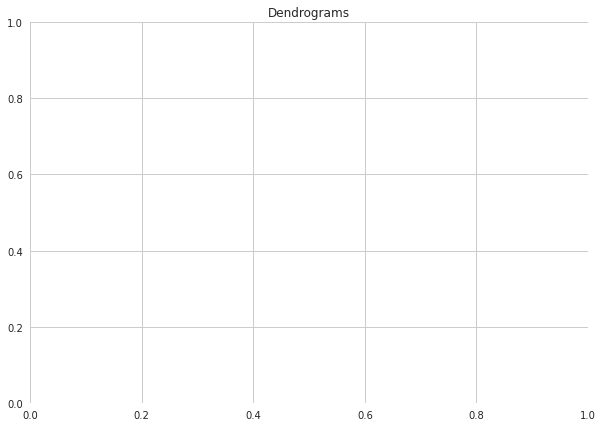

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")
cluster_result = shc.linkage(train_df[gene_cols], method = 'ward')


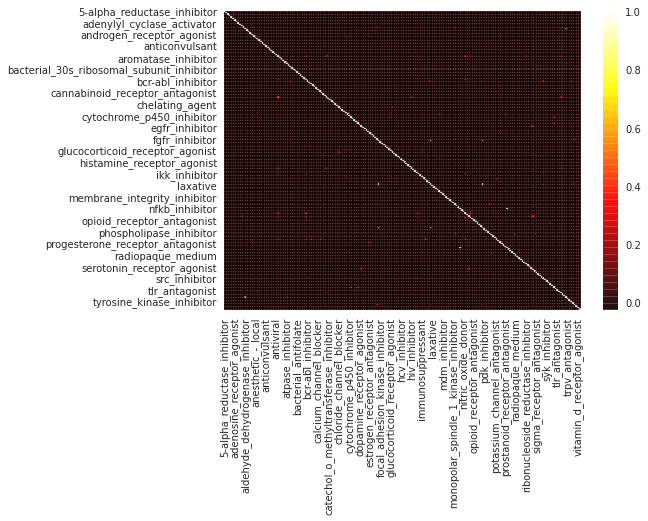

In [ ]:
#gene correlation plots
target_df = pd.read_csv('train_targets_scored.csv')
target_cols = [col for col in target_df.columns if col not in ['sig_id']]
sns.heatmap(target_df[target_cols].corr(),cmap='hot',alpha=0.75)
plt.savefig('target_corr.png',bbox_inches = 'tight',dpi=300)

#zero correlation

#what does non-scored target mean?

In [ ]:
#correlation among genes and cell viability

gene_cols = [col for col in list(train_df.columns) if 'g-' in col]
cell_cols = [col for col in list(train_df.columns) if 'c-' in col]

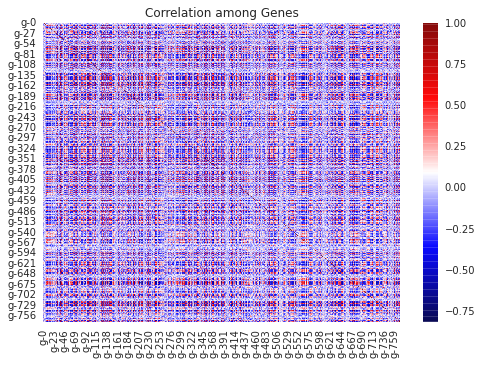

In [ ]:
sns.heatmap(train_df[gene_cols].corr(),cmap='seismic',alpha=0.8)
plt.title('Correlation among Genes')
plt.savefig('gene_corr.png',bbox_inches = 'tight',dpi=300)

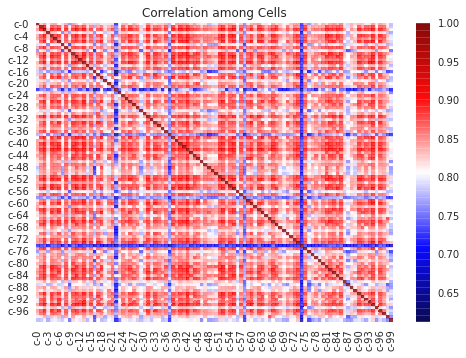

In [ ]:
sns.heatmap(train_df[cell_cols].corr(), cmap = 'seismic', alpha = 0.8)
plt.title("Correlation among Cells")
plt.savefig('cell_corr.png',bbox_inches = 'tight',dpi=300)

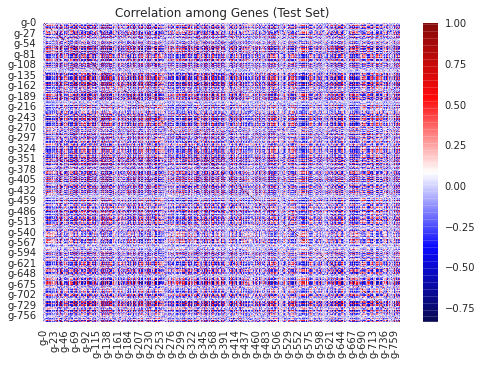

In [ ]:
#show correlation in test set

sns.heatmap(test_df[gene_cols].corr(),cmap = 'seismic',alpha = 0.8)
plt.title('Correlation among Genes (Test Set)')
plt.savefig('test_corr.png',bbox_inches = 'tight', dpi = 300)



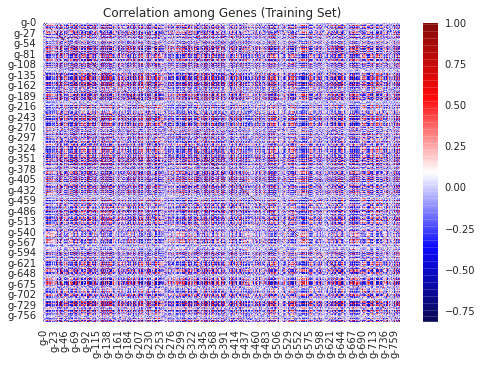

In [ ]:
sns.heatmap(train_df[gene_cols].corr(),cmap='seismic',alpha=0.8)
plt.title('Correlation among Genes (Training Set)')
plt.savefig('gene_corr.png',bbox_inches = 'tight',dpi=300)

In [ ]:
#find correlation within one drug

#find subjects of drug cacb2b860 (most abundant drug)
subject_list = []
for index,row in drug_df.iterrows():
    if row['drug_id'] == 'cacb2b860':
        subject_list.append(row['sig_id'])


temp_df = train_df[train_df['sig_id'].isin(subject_list)]

In [ ]:
random_genes = np.random.choice(gene_cols,4)
random_cells = np.random.choice(cell_cols,4)

In [ ]:
sns.set_style('whitegrid')
for gene in random_genes:
    sns.kdeplot(temp_df[gene], label = gene)
plt.legend()
plt.title('randomly selected genes from drug cabc2b860')
plt.xlabel('')
plt.savefig('drug_gene.png',bbox_inches = 'tight',dpi=300)

In [ ]:
for cell in random_cells:
    sns.kdeplot(temp_df[cell],label = cell)
plt.legend()
plt.title('randomly selected cells from drug cabc2b860')
plt.xlabel('')
plt.savefig('drug_cell.png',bbox_inches = 'tight',dpi=300)

In [ ]:
ctrl_df = train_df[train_df['cp_type'] == 0]

In [ ]:
ctrl_tsne = TSNE(n_components = 2, learning_rate = 'auto', init = 'random').fit_transform(ctrl_df.drop('sig_id',axis=1).to_numpy())

In [ ]:
tsne_df = pd.DataFrame({'dim1': ctrl_tsne[:,0], 'dim2': ctrl_tsne[:,1], 'cp_time': ctrl_df['cp_time']})

In [ ]:
tsne_df

,dim1,dim2,cp_time
25,-27.608133,11.579654,48
38,25.212633,11.333463,24
40,0.892703,39.006916,24
47,-31.207106,-4.054561,48
63,16.889034,9.847927,24
...,...,...,...
23729,24.131199,9.899487,24
23747,-4.161499,-34.083210,72
23768,24.060848,-31.710913,72
23793,-18.835121,22.420473,48


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



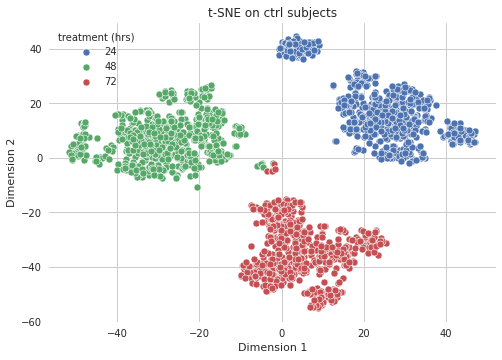

In [ ]:
for time in [24, 48, 72]:
    sns.scatterplot(tsne_df.loc[tsne_df['cp_time'] == time]['dim1'],tsne_df.loc[tsne_df['cp_time'] == time]['dim2'], label = time)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE on ctrl subjects')
plt.legend(title = 'treatment (hrs)')
plt.savefig('ctrl_tsne.png',bbox_inches = 'tight', dpi = 300)

In [ ]:
pca = PCA(n_components=2)
ctrl_pca = pca.fit_transform(ctrl_df.drop('sig_id',axis=1).to_numpy())

In [ ]:
ctrl_pca_df = pd.DataFrame({'PC1': ctrl_pca[:,0], 'PC2': ctrl_pca[:,1], 'cp_time': ctrl_df['cp_time']})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



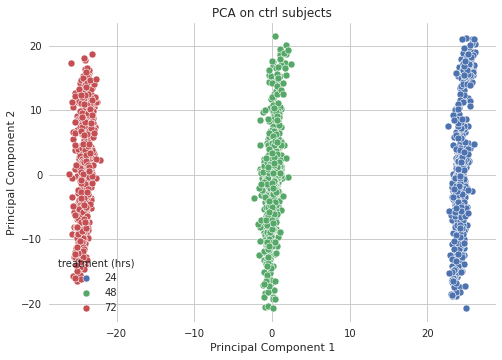

In [ ]:
for time in [24, 48, 72]:
    sns.scatterplot(ctrl_pca_df.loc[ctrl_pca_df['cp_time'] == time]['PC1'],ctrl_pca_df.loc[ctrl_pca_df['cp_time'] == time]['PC2'], label = time)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on ctrl subjects')
plt.legend(title = 'treatment (hrs)')
plt.savefig('ctrl_pca.png',bbox_inches = 'tight', dpi = 300)